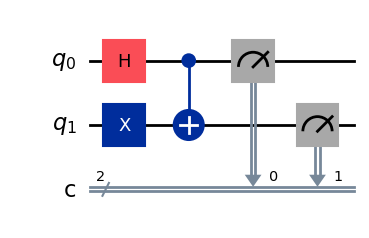

In [13]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)

qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))


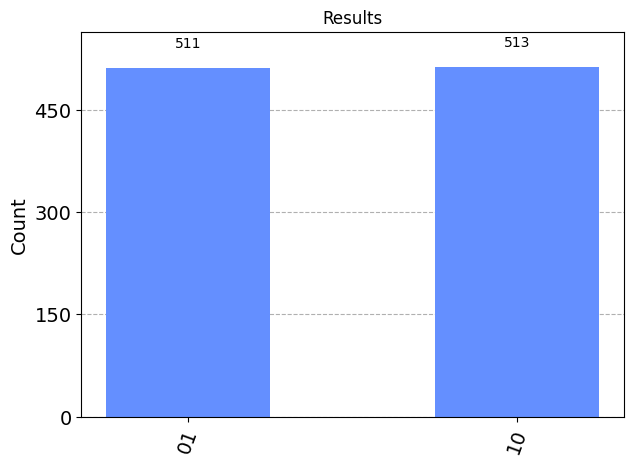

In [14]:
simulator = BasicAer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1024, seed_simulator=42)
result = job.result()

counts = result.get_counts()

display(plot_histogram(counts, title="Results"))


In [4]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account("2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a",overwrite=True)
IBMProvider.saved_accounts()

# pode ser necessário definir o argumento "instance"
# ver na IBM quantum platform >> account >> manage account >> profile overvies
provider = IBMProvider()



In [5]:
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>]

In [6]:
quantum_devices_available = provider.backends(simulator=False, operational=True)

quantum_devices_available

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>]

In [7]:
backend = quantum_devices_available[1]

backend

<IBMBackend('ibm_kyoto')>

In [8]:
backend.name

'ibm_kyoto'

In [9]:
backend.status()

In [10]:
backend.num_qubits

127

In [13]:
from qiskit_ibm_provider import least_busy

devices = provider.backends(simulator=False, operational=True)
backend_least_busy = least_busy(devices)

backend_least_busy.status()



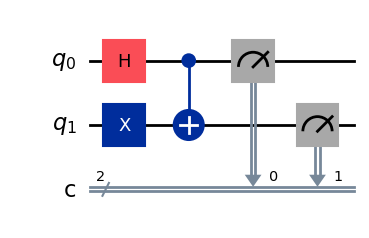

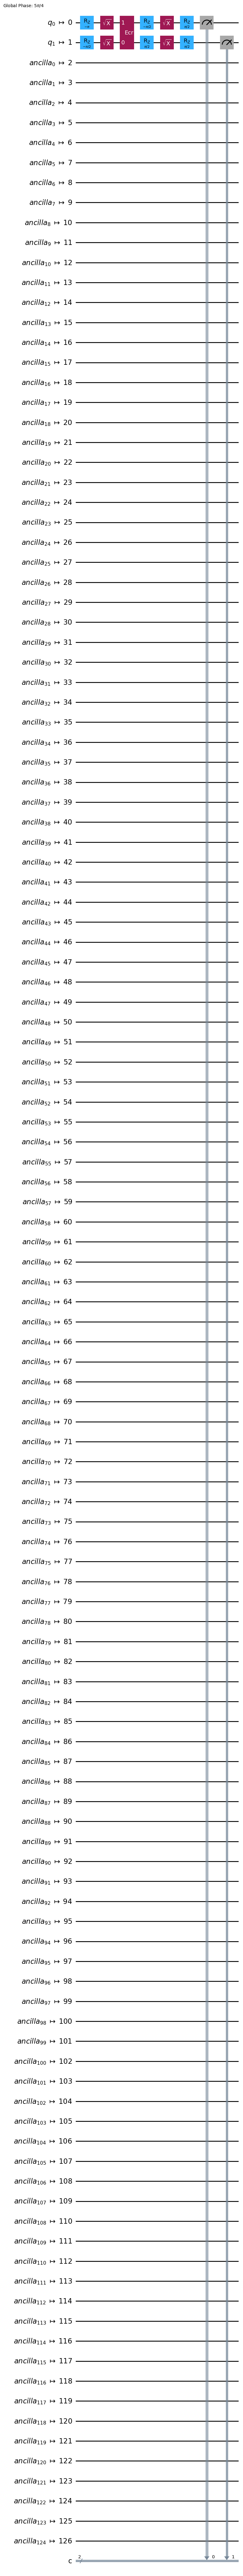

In [14]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 2)

qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================

from qiskit.compiler import transpile

mapped_circuit = transpile(qc, backend=backend)

display(mapped_circuit.draw("mpl", style="iqp"))


In [42]:
#Executando o job
job = backend_least_busy.run(mapped_circuit, shots=1024, job_tags=["exemplo:bell"])



In [28]:


job.status()



<JobStatus.QUEUED: 'job is queued'>

In [29]:
job.job_id()

'cpn5wjt9nad0008pr4h0'

In [5]:
for ran_job in provider.backend.jobs(limit=5):
    
    print(f'{ran_job.job_id()} - date: {ran_job.creation_date().date()} - tags: {ran_job.tags()} - status: {ran_job.status()} ')

cpn62htd7p30008621rg - date: 2024-01-19 - tags: ['bell'] - status: JobStatus.DONE 
cpn6208d7p30008621pg - date: 2024-01-19 - tags: ['bell'] - status: JobStatus.DONE 
cpn5xgp9nad0008pr4kg - date: 2024-01-19 - tags: ['bell'] - status: JobStatus.DONE 
cpn5wjt9nad0008pr4h0 - date: 2024-01-19 - tags: ['bell'] - status: JobStatus.DONE 
cpfykpymbjng00868mr0 - date: 2024-01-11 - tags: ['ghz'] - status: JobStatus.DONE 


In [16]:
#Aqui ele vai rodar um job que ele já fez antes
retrieved_job = provider.backend.retrieve_job("cpn5xgp9nad0008pr4kg")

retrieved_job



<IBMCircuitJob('cpn5xgp9nad0008pr4kg')>

In [17]:
retrieved_job.backend()

<IBMBackend('ibm_kyoto')>

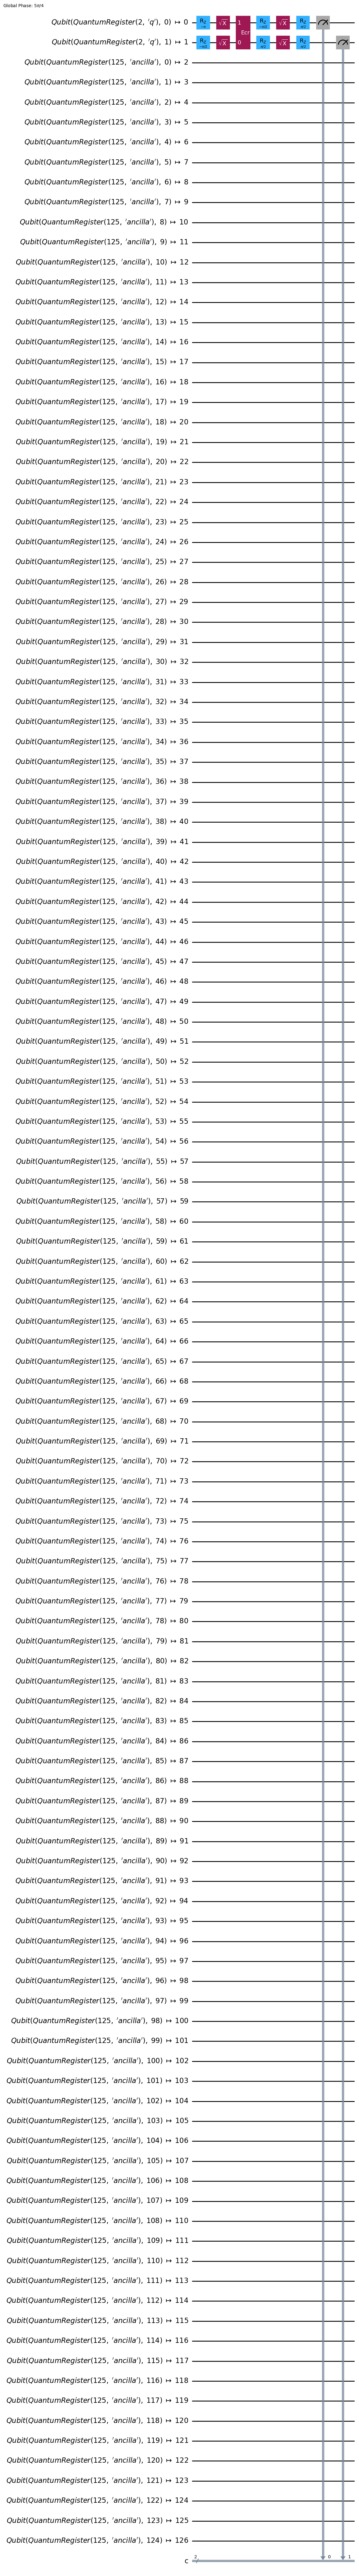

In [18]:
retrieved_job.circuits()[0].draw("mpl", style="iqp")

In [23]:
retrieved_job.result().get_counts()

{'00': 53, '10': 413, '01': 453, '11': 105}

In [6]:
#Ele vai comparar os dois agora
job1 = provider.backend.retrieve_job("cpn5xgp9nad0008pr4kg")

job1.status()

<JobStatus.DONE: 'job has successfully run'>

In [8]:
counts_hardware1 = job1.result().get_counts()

counts_hardware1

{'00': 53, '10': 413, '01': 453, '11': 105}

In [15]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram


job_simulator1 = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator1 = job_simulator1.result().get_counts()

counts_simulator1


{'01': 511, '10': 513}

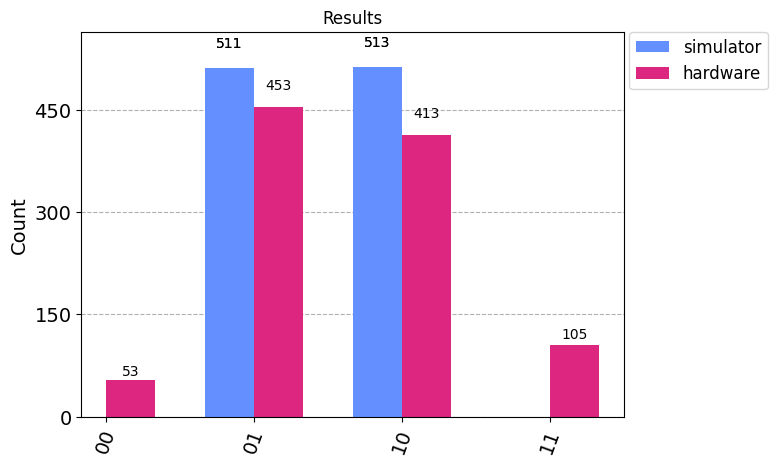

In [23]:
legend=["simulator", "hardware"]

plot_histogram([counts_simulator1, counts_hardware1], title="Results", legend=legend)

In [16]:
#ibm_osaka
job2 = provider.backend.retrieve_job("cpn62htd7p30008621rg") 

job2.status()

<JobStatus.DONE: 'job has successfully run'>

In [17]:
counts_hardware2 = job2.result().get_counts()

counts_hardware2

{'10': 508, '11': 21, '00': 31, '01': 464}

In [18]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram


job_simulator2 = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator2 = job_simulator2.result().get_counts()

counts_simulator2

{'01': 511, '10': 513}

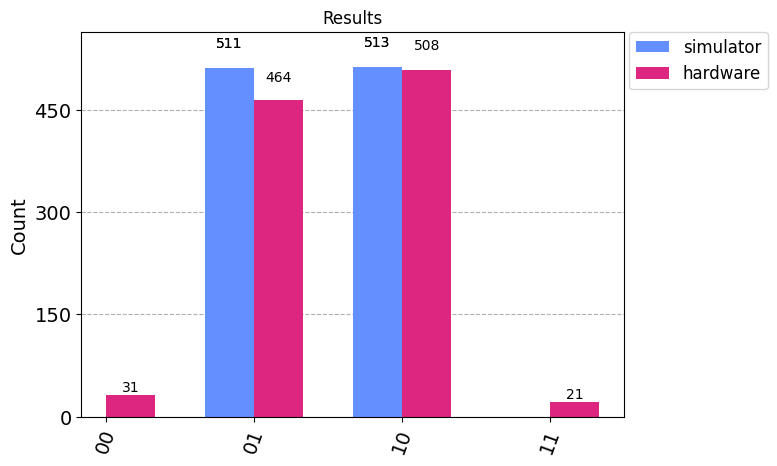

In [34]:
legend=["simulator", "hardware"]

plot_histogram([counts_simulator2, counts_hardware2], title="Results", legend=legend)

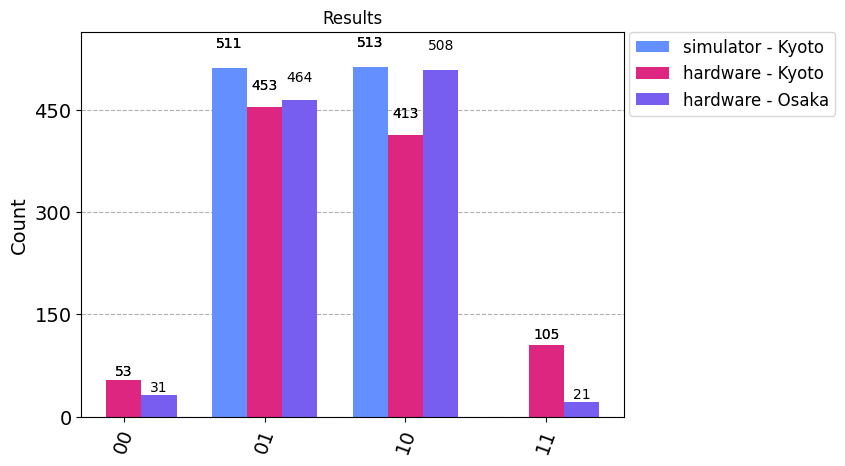

In [35]:
legend=["simulator - Kyoto", "hardware - Kyoto","hardware - Osaka"]

plot_histogram([counts_simulator1 , counts_hardware1, counts_hardware2], title="Results", legend=legend)

In [20]:
from qiskit.providers.fake_provider import FakeCairoV2

fake_backend1 = FakeCairoV2()

fake_backend1


In [21]:
from qiskit_aer.noise import NoiseModel

noise_model1 = NoiseModel.from_backend(fake_backend1)

print(noise_model1)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'measure', 'sx', 'reset', 'cx', 'id']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)

In [22]:
job_simulator_noisy1 = execute(qc, fake_backend1, shots=1024, seed_simulator=42)
counts_simulator_noisy1 = job_simulator_noisy1.result().get_counts()

counts_simulator_noisy1

{'10': 483, '01': 509, '00': 20, '11': 12}

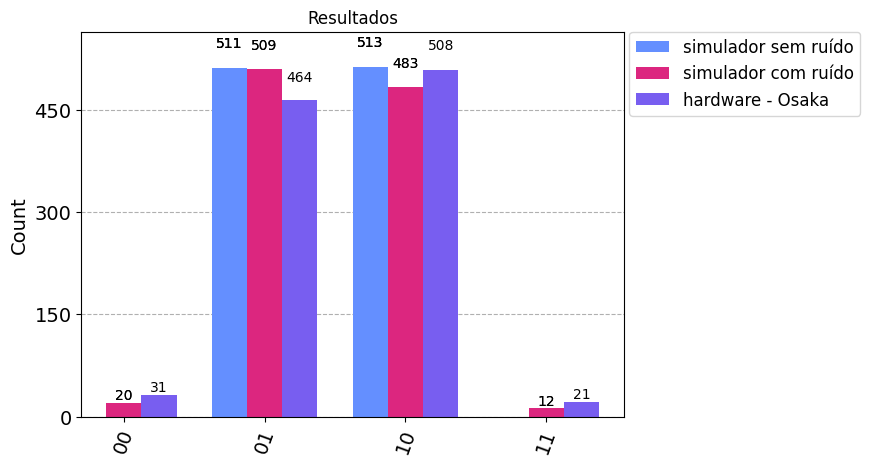

In [23]:
legend=["simulador sem ruído", "simulador com ruído", "hardware - Osaka"]

plot_histogram([counts_simulator1, counts_simulator_noisy1, counts_hardware2], title="Resultados", legend=legend)


In [24]:

from qiskit.providers.fake_provider import FakeBelemV2

fake_backend2 = FakeBelemV2()

fake_backend2



In [25]:
from qiskit_aer.noise import NoiseModel

noise_model2 = NoiseModel.from_backend(fake_backend2)

print(noise_model2)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'measure', 'sx', 'reset', 'cx', 'id']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (2, 1)), ('cx', (1, 2)), ('cx', (1, 0)), ('cx', (0, 1)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


In [26]:
job_simulator_noisy2 = execute(qc, fake_backend2, shots=1024, seed_simulator=42)
counts_simulator_noisy2= job_simulator_noisy2.result().get_counts()

counts_simulator_noisy2


{'10': 459, '01': 483, '00': 61, '11': 21}

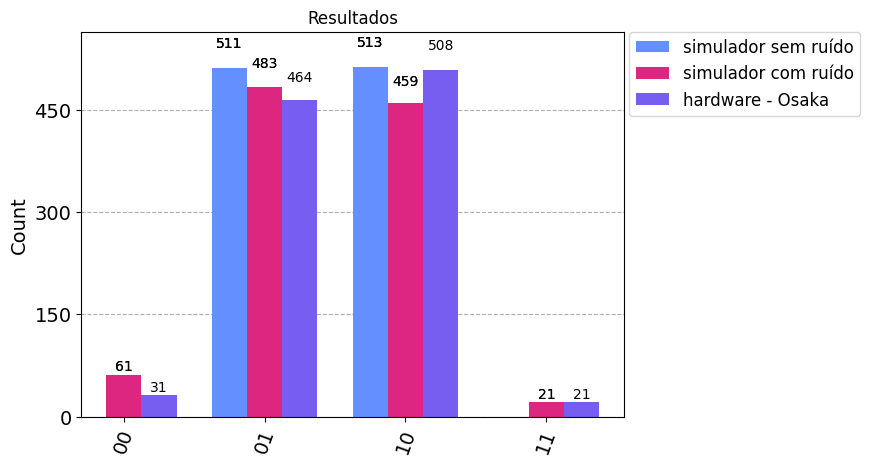

In [27]:
legend=["simulador sem ruído", "simulador com ruído", "hardware - Osaka"]

plot_histogram([counts_simulator1, counts_simulator_noisy2, counts_hardware2], title="Resultados", legend=legend)


In [28]:
from qiskit.providers.fake_provider import FakeCambridgeV2

fake_backend3 = FakeCambridgeV2()

fake_backend3


In [29]:
from qiskit_aer.noise import NoiseModel

noise_model3 = NoiseModel.from_backend(fake_backend3)

print(noise_model3)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'measure', 'u3', 'cx', 'id']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('id', (27,)), ('u2', (0,)), ('u2', (1,)), ('u2', (2,)), ('u2', (3,)), ('u2', (4,)), ('u2', (5,)), ('u2', (6,)), ('u2', (7,)), ('u2', (8,)), ('u2', (9,)), ('u2', (10,)), ('u2', (11,)), ('u2', (12,)), ('u2', (13,)), ('u2', (14,)), ('u2', (15,)), ('u2', (16,)), ('u2', (17,)), ('u2', (18,)), ('u2', (19,)), ('u2', (2

In [30]:
job_simulator_noisy3 = execute(qc, fake_backend3, shots=1024, seed_simulator=42)
counts_simulator_noisy3= job_simulator_noisy3.result().get_counts()

counts_simulator_noisy3

{'10': 372, '01': 388, '00': 98, '11': 166}

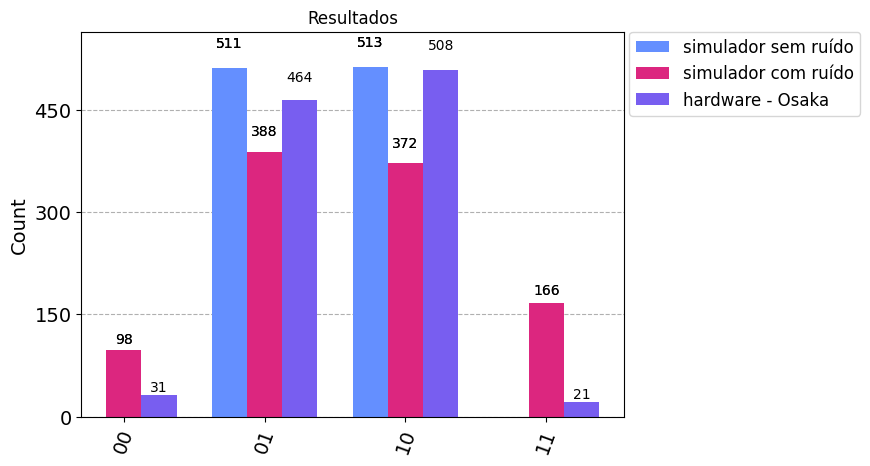

In [32]:
legend=["simulador sem ruído", "simulador com ruído", "hardware - Osaka"]

plot_histogram([counts_simulator1, counts_simulator_noisy3, counts_hardware2], title="Resultados", legend=legend)


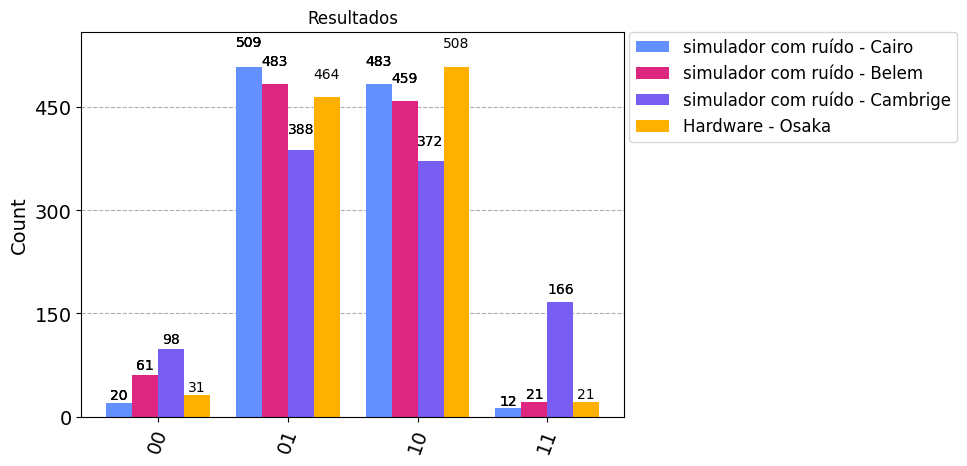

In [33]:
legend=["simulador com ruído - Cairo", "simulador com ruído - Belem","simulador com ruído - Cambrige", "Hardware - Osaka"]

plot_histogram([counts_simulator_noisy1, counts_simulator_noisy2, counts_simulator_noisy3,counts_hardware2], title="Resultados", legend=legend)

In [55]:
backend_least_busy

<IBMBackend('ibm_osaka')>

In [56]:
from qiskit.providers.aer import AerSimulator

fake_backend = AerSimulator.from_backend(backend_least_busy)



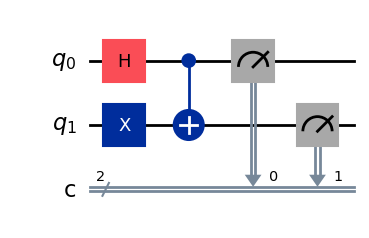

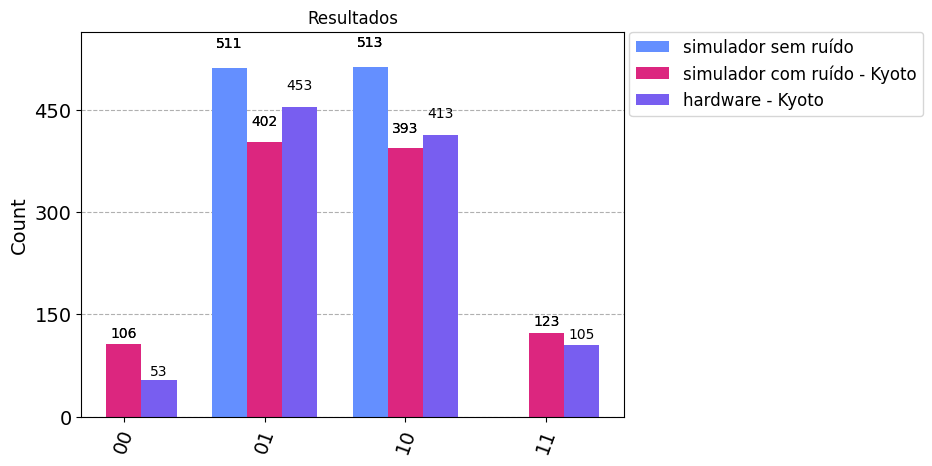

In [59]:
qc = QuantumCircuit(2, 2)

qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(2), range(2))

display(qc.draw("mpl", style="iqp"))

# ==============================
# simulador sem ruído

simulator = BasicAer.get_backend('qasm_simulator')

job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

# ==============================
# simulador com ruído

fake_backend = AerSimulator.from_backend(provider.get_backend('ibm_kyoto'))

job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()

# ==============================

legend=["simulador sem ruído", "simulador com ruído - Kyoto","hardware - Kyoto"]
display(plot_histogram([counts_simulator, counts_simulator_noisy,counts_hardware1], title="Resultados", legend=legend))

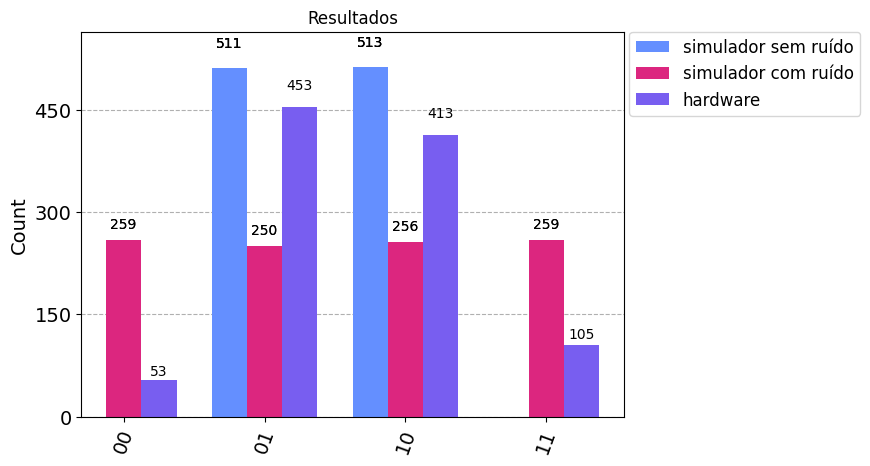

In [75]:
#Esse histograma que mostrava no dia que eu rodei pela primeira vez ele
legend=["simulador sem ruído", "simulador com ruído", "hardware"]

plot_histogram([counts_simulator, counts_simulator_noisy, counts_hardware1], title="Resultados", legend=legend)


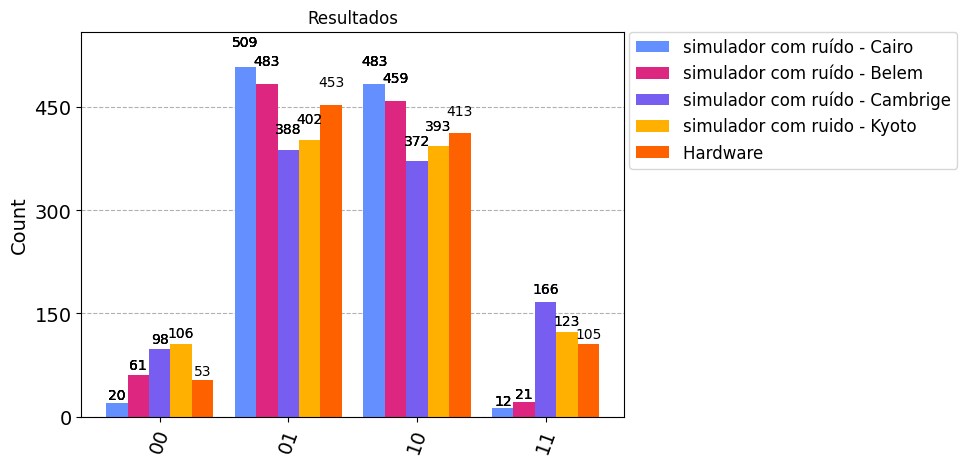

In [60]:
legend=["simulador com ruído - Cairo", "simulador com ruído - Belem","simulador com ruído - Cambrige","simulador com ruido - Kyoto", "Hardware "]

plot_histogram([counts_simulator_noisy1, counts_simulator_noisy2, counts_simulator_noisy3,counts_simulator_noisy,counts_hardware1], title="Resultados", legend=legend)

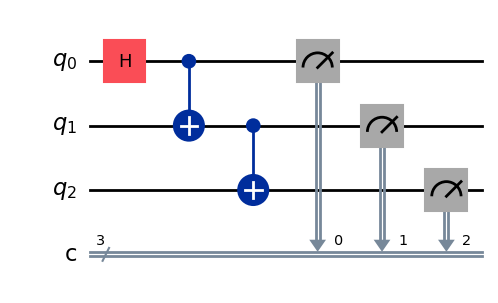

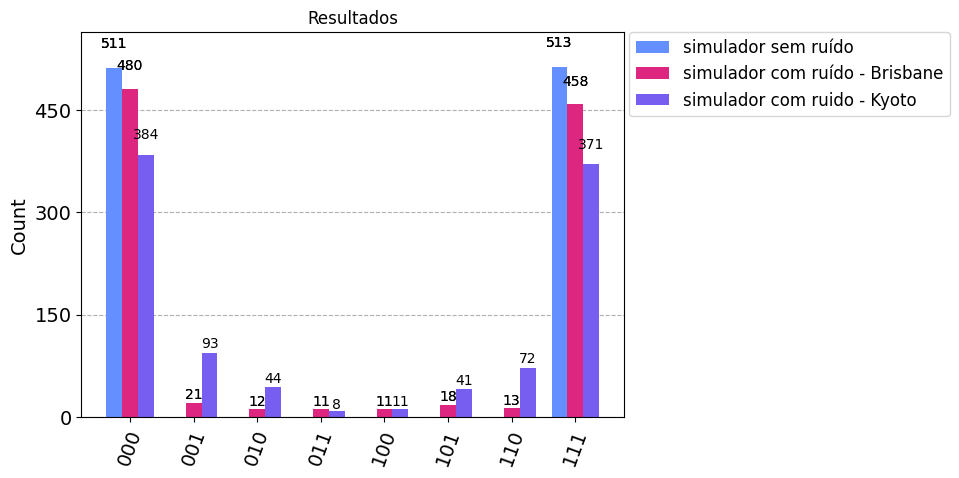

In [61]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.measure(range(3), range(3))

display(qc.draw("mpl", style="iqp"))

# ==============================
# simulador sem ruído

simulator = BasicAer.get_backend('qasm_simulator')

job_simulator = execute(qc, simulator, shots=1024, seed_simulator=42)
counts_simulator = job_simulator.result().get_counts()

# ==============================
# simulador com ruído

fake_backend1 = AerSimulator.from_backend(provider.get_backend('ibm_kyoto'))

job_simulator_noisy1 = execute(qc, fake_backend1, shots=1024, seed_simulator=42)
counts_simulator_noisy1 = job_simulator_noisy1.result().get_counts()

# ==============================

fake_backend = AerSimulator.from_backend(provider.get_backend('ibm_brisbane'))

job_simulator_noisy = execute(qc, fake_backend, shots=1024, seed_simulator=42)
counts_simulator_noisy = job_simulator_noisy.result().get_counts()


legend=["simulador sem ruído", "simulador com ruído - Brisbane","simulador com ruido - Kyoto"]
display(plot_histogram([counts_simulator, counts_simulator_noisy, counts_simulator_noisy1], title="Resultados", legend=legend))